# Imports

In [1]:
from diffusers import StableDiffusionPipeline, DiffusionPipeline, UNet2DConditionModel
from transformers import CLIPTextModel
from utils import get_device, plot_img
import torch

/home/shane/projects/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Parameters

In [2]:
trained_text_encoder = False

In [3]:
model_id = "stabilityai/stable-diffusion-2-1"
unet_path = "./content/stable_diffusion_weights/sks/checkpoint-500/unet"
text_encoder_path = "./content/stable_diffusion_weights/sks/checkpoint-500/text_encoder"

prompt = "A photo of sks dog in a bucket"
num_inference_steps = 50
guidance_scale = 7.5

# Inference from model

In [4]:
finetuned_model = "./content/stable_diffusion_weights/sks"
pipe = StableDiffusionPipeline.from_pretrained(finetuned_model, torch_dtype=torch.float16).to("cuda")

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:2                                                                                    │
│                                                                                                  │
│   1 finetuned_model = "./content/stable_diffusion_weights/sks/checkpoint-500/pytorch_model"      │
│ ❱ 2 pipe = StableDiffusionPipeline.from_pretrained(finetuned_model, torch_dtype=torch.float1     │
│   3                                                                                              │
│   4 prompt = "A photo of sks dog in a bucket"                                                    │
│   5 image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0]                   │
│                                                                                                  │
│ /home/shane/projects/.venv/lib/python3.10/site-packages/diffusers/pipelines/pipeline_utils.py:80 │
│ 3 in from_pretrained                                                                             │
│                                                                                                  │
│    800 │   │   else:                                                                             │
│    801 │   │   │   cached_folder = pretrained_model_name_or_path                                 │
│    802 │   │                                                                                     │
│ ❱  803 │   │   config_dict = cls.load_config(cached_folder)                                      │
│    804 │   │                                                                                     │
│    805 │   │   # 2. Define which model components should load variants                           │
│    806 │   │   # We retrieve the information by matching whether variant                         │
│                                                                                                  │
│ /home/shane/projects/.venv/lib/python3.10/site-packages/diffusers/configuration_utils.py:338 in  │
│ load_config                                                                                      │
│                                                                                                  │
│   335 │   │   │   ):                                                                             │
│   336 │   │   │   │   config_file = os.path.join(pretrained_model_name_or_path, subfolder, cls   │
│   337 │   │   │   else:                                                                          │
│ ❱ 338 │   │   │   │   raise EnvironmentError(                                                    │
│   339 │   │   │   │   │   f"Error no file named {cls.config_name} found in directory {pretrain   │
│   340 │   │   │   │   )                                                                          │
│   341 │   │   else:                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
OSError: Error no file named model_index.json found in directory 
./content/stable_diffusion_weights/sks/checkpoint-500/pytorch_model.

In [ ]:
image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0]
plot_img(image)

# Load Checkpoint & Model

In [4]:
unet = UNet2DConditionModel.from_pretrained(unet_path, torch_dtype=torch.float16)
if trained_text_encoder:
    text_encoder = CLIPTextModel.from_pretrained(text_encoder_path)
    pipe = DiffusionPipeline.from_pretrained(model_id, unet=unet, text_encoder=text_encoder, torch_dtype=torch.float16).to(get_device())
else:
    pipe = DiffusionPipeline.from_pretrained(model_id, unet=unet, torch_dtype=torch.float16).to(get_device())

/home/shane/projects/.venv/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
/home/shane/projects/.venv/lib/python3.10/site-packages/safetensors/torch.py:99: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  with safe_open(filename, framework="pt", device=device) as f:
/home/shane/projects/.venv/lib/python3.10/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStora

# Do inference

100%|██████████| 50/50 [00:10<00:00,  4.96it/s]


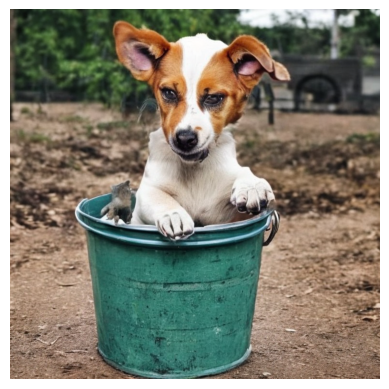

In [6]:
image = pipe(prompt, num_inference_steps=num_inference_steps, guidance_scale=guidance_scale).images[0]
plot_img(image)